# **CodeClause**

## **Golden Project - Price Recommendation for Online Sellers**

### *Author - Vaibhav Patil*

**Import Packages**
***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
from string import punctuation

In [4]:
# vstack - adds rows, hstack - adds columns
# csr_matrix - used to handle sparse matrix
from scipy.sparse import vstack, hstack, csr_matrix

In [5]:
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer

In [7]:
# Ridge - Reduces multicollinearity in regression. Applies L2 Regularization
from sklearn.linear_model import Ridge

**Importing Training and Testing Data**

In [8]:
# Create training set
train = pd.read_csv('Data/train.tsv', sep = '\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [9]:
# Create testing set
test = pd.read_csv('Data/test.tsv', sep = '\t',engine = 'python')

In [10]:
# Create log price variable (Transformation)
y = np.log1p(train['price'])

### Dataset Features

- **ID**: the id of the listing
- **Name:** the title of the listing
- **Item Condition:** the condition of the items provided by the seller
- **Category Name:** category of the listing
- **Brand Name:** brand of the listing
- **Shipping:** whether or not shipping cost was provided
- **Item Description:** the full description of the item
- **Price:** the price that the item was sold for. This is the target variable that you will predict. The unit is USD.

**Combining Train andd Test Data**

In [11]:
# Create combined set. You would want to apply count vectorizer on combined set so you can get the list of all possible words.
combined = pd.concat([train,test])

# Create the submission set (Only contains the test ID)
submission = test[['test_id']]

# Create size of train
train_size = len(train)

In [12]:
combined.shape

(2175894, 9)

In [13]:
combined_ML = combined.sample(frac=0.1).reset_index(drop=True)

In [14]:
combined_ML.shape

(217589, 9)

# Representing and Mining Text
***
Text is the most **unstructured** form of all the available data, various types of noise are present in it and the data is not readily analyzable without any pre-processing. 

The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text pre-processing**.
 
### Important Terminologies
- **Document**: One piece of text. It could be a single sentence, a paragraph, or even a full page report. 
- **Tokens**: Also known as terms. It is simply just a word. So many tokens form a document. 
- **Corpus**: A collection of documents. 
- **Term Frequency (TF)**: Measures how often a term is in a single document
- **Inverse Document Frequency (IDF)**: distribution of a term over a corpus

### Pre-Processing Techniques
- **Stop Word Removal:** stop words are terms that have little no meaning in a given text. Think of it as the "noise" of data. Such terms include the words, "the", "a", "an", "to", and etc...

- **TFIDF**: a common value representation of terms. It boosts or weighs words that have low occurences. For example, if the word "play" is common, then there is little to no boost. But if the word "mercari" is rare, then it has more boosts/weight. 

- **N-grams**: Sequences of adjacent words as terms. For example, since a word by itself may have little to no value, but if you were to put two words together and analyze it as a pair, then it might add more meaning. 

- **Stemming and Lemmatization**:

- **Named Entity Extraction**: A pre-processing technique used to know  when word sequences constitute proper names. Example, "HP", "H-P", and "Hewlett-Packard" all represent the Hewlett-Packard Corporation.

- **Topic Models**: A type of model that represents a set of topics from a sequence of words. 

**Preparing the Corpus for Analysis**
***
That Contains

1.Remove Punctuations

2.Remove Digits

3.Remove Stop Words

4.Lower Case Words

5.Stemming

**Removing Punctuations**

In [15]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# Create a list of punctuation replacements
punctuation_symbols = []
for symbol in punctuation:
    punctuation_symbols.append((symbol, ''))
    
punctuation_symbols

[('!', ''),
 ('"', ''),
 ('#', ''),
 ('$', ''),
 ('%', ''),
 ('&', ''),
 ("'", ''),
 ('(', ''),
 (')', ''),
 ('*', ''),
 ('+', ''),
 (',', ''),
 ('-', ''),
 ('.', ''),
 ('/', ''),
 (':', ''),
 (';', ''),
 ('<', ''),
 ('=', ''),
 ('>', ''),
 ('?', ''),
 ('@', ''),
 ('[', ''),
 ('\\', ''),
 (']', ''),
 ('^', ''),
 ('_', ''),
 ('`', ''),
 ('{', ''),
 ('|', ''),
 ('}', ''),
 ('~', '')]

In [17]:
import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

**Remove Digits**

In [18]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

**Removing Stop Words**

In [19]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Vaibhav
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

In [21]:
# Removing lower case words
def to_lower(x):
    return x.lower()

**Exploratory Data Analysis for training data**
***
**Missing Values**

Category Name

Brand Name

Item Description

**Categorical Variables**

Name

Category Name 

Brand Name

Item Description

**Checking Missing Values**

In [22]:
train.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

**Check Data Types**

In [23]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

**1.Price Distributations**

**Price Distributions**

*Why Do Price Vary?*
- Supply and Demand
- Brand Name
- Fabric Terms
- "Quality"-Type Words (Check to see if quality plays a role in price)
- Condition 

In [77]:
# pd.options.display.float_format = "{:.2f}".format
train.price.describe()

count   1482535.00
mean         26.74
std          38.59
min           0.00
25%          10.00
50%          17.00
75%          29.00
max        2009.00
Name: price, dtype: float64

*Summary:*
- The mean price in the dataset is **26 Dollars**
- The median price in the dataset is **17 Dollars**
- The max price in the dataset is **2009 Dollars**
- Due to the skewed dataset, the **median** price is a more reliable price to gauge off of.

In [25]:
# Could we use these as features? Look at median price for each quantile
bins = [0, 10, 17, 29, 2001]
labels = ['q1','q2','q3','q4']
train['price_bin'] = pd.cut(train['price'], bins=bins, labels=labels)
train.groupby('price_bin')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_bin,,,,,,,,
q1,375615.0,7.715192,2.077888,3.0,6.0,8.0,10.0,10.0
q2,378177.0,13.842940,1.794584,10.5,12.0,14.0,15.0,17.0
q3,359743.0,22.555694,3.337832,17.5,20.0,22.0,25.0,29.0
q4,368123.0,63.527701,63.508250,29.5,35.0,45.0,66.0,2000.0


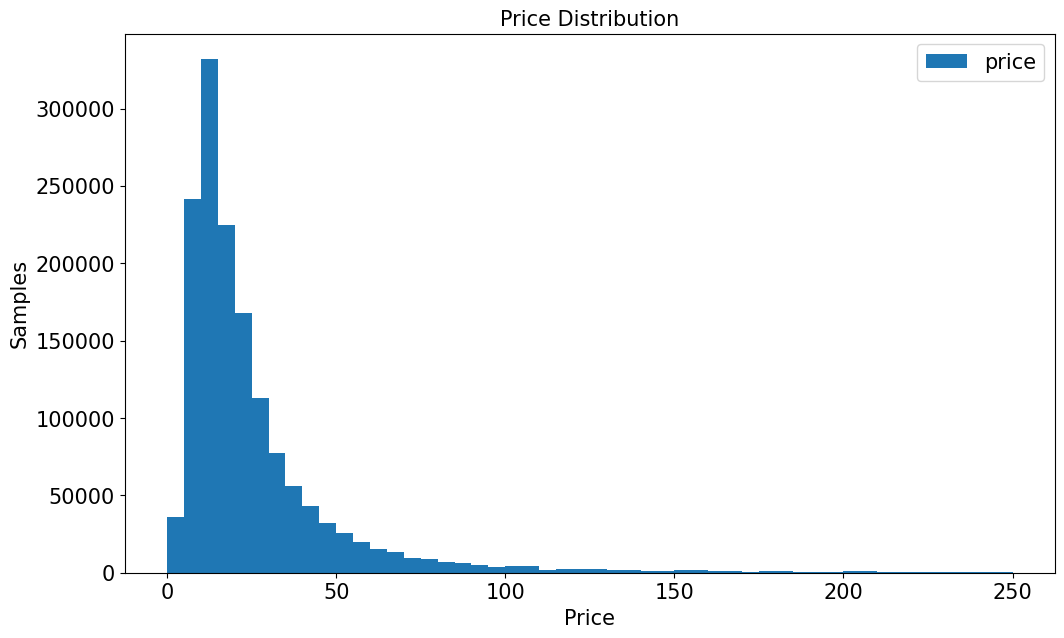

In [26]:
plt.figure(figsize=(12, 7))
plt.hist(train['price'], bins=50, range=[0,250], label='price')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Samples', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

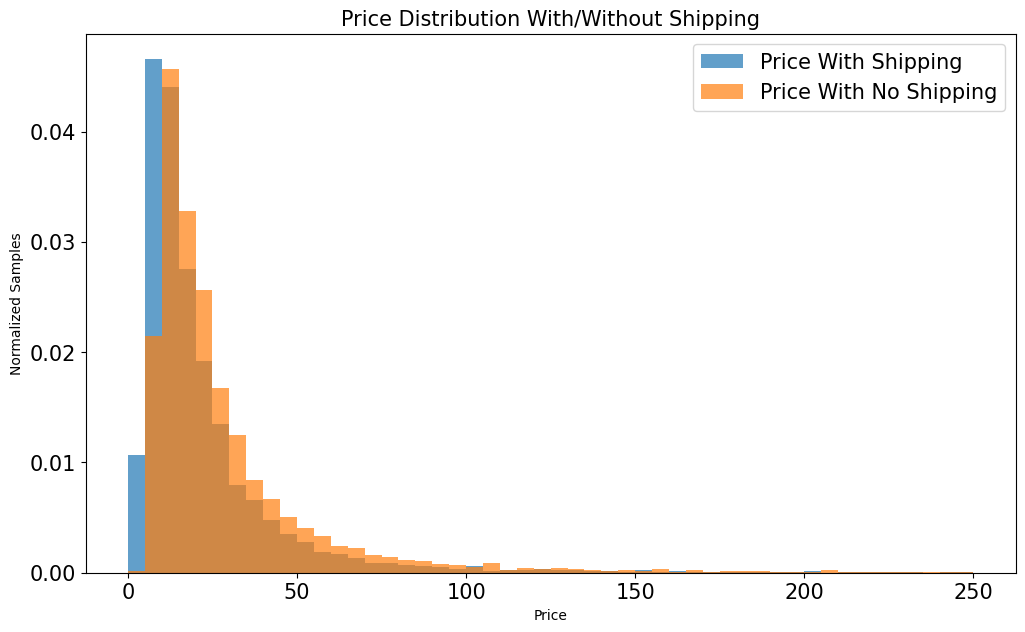

In [27]:
shipping = train[train['shipping'] == 1]['price']
no_shipping = train[train['shipping'] == 0]['price']

plt.figure(figsize=(12, 7))
plt.hist(shipping, bins=50, density=True, range=[0, 250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, density=True, range=[0, 250], alpha=0.7, label='Price With No Shipping')
plt.title('Price Distribution With/Without Shipping', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Normalized Samples')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


**2.Brand Analysis**

In [28]:
# Amount of unique brand names
train['brand_name'].nunique()

4809

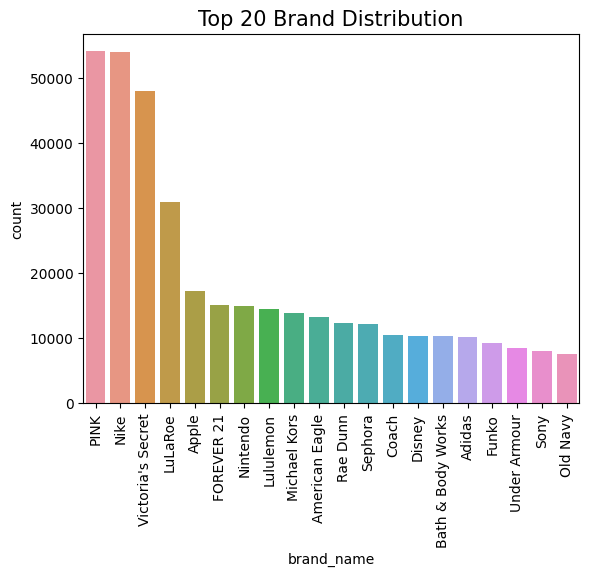

In [29]:
# Top 20 Brand Distribution
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\620664700.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top20_brand = train.groupby('brand_name', axis=0).mean()


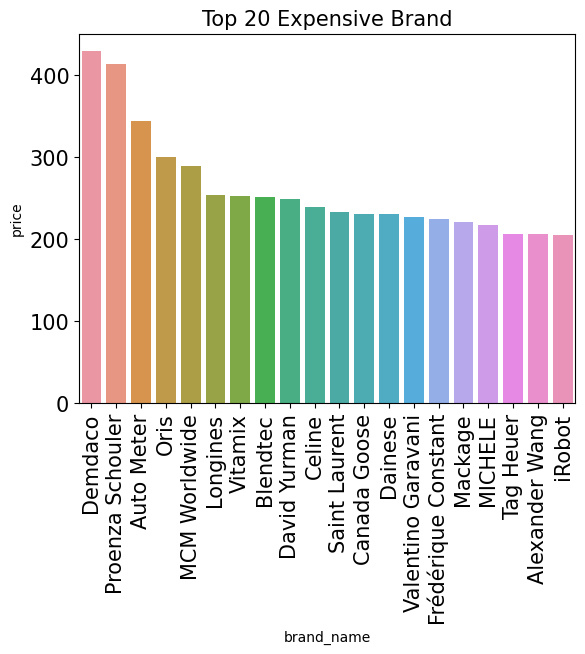

PINK                    0.063644
Nike                    0.063591
Victoria's Secret       0.056523
LuLaRoe                 0.036505
Apple                   0.020382
                          ...   
The Learning Journey    0.000001
Pampers Baby Fresh      0.000001
Huggies One & Done      0.000001
Classic Media           0.000001
Kids Only               0.000001
Name: brand_name, Length: 4809, dtype: float64

In [30]:
# Display Top 20 Expensive Brands By Mean Price
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

**3. Category Distributions**

In [31]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


**3. Main Category**

In [32]:
# Electronics have the highest std
train.groupby('category_main')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_main,,,,,,,,
Beauty,207828.0,19.671536,21.360135,0.0,10.0,15.0,24.0,2000.0
Electronics,119631.0,34.191769,64.037637,0.0,9.0,15.0,30.0,1909.0
Handmade,30840.0,18.154410,27.756418,0.0,6.0,12.0,20.0,1750.0
Home,67871.0,24.536599,24.417061,0.0,12.0,18.0,29.0,848.0
Kids,171689.0,20.642315,22.730876,0.0,10.0,14.0,24.0,809.0
Men,93363.0,34.693347,41.264184,0.0,14.0,21.0,40.0,1309.0
Other,45351.0,20.809817,29.847758,0.0,9.0,14.0,23.0,1400.0
Sports & Outdoors,24331.0,25.534565,29.324018,0.0,11.0,16.0,28.0,915.0
Vintage & Collectibles,46530.0,27.339426,53.507495,0.0,10.0,16.0,27.0,1709.0


In [33]:
# Display distribution
train['category_main'].value_counts(1)

Women                     0.451404
Beauty                    0.141205
Kids                      0.116651
Electronics               0.081281
Men                       0.063434
Home                      0.046114
Vintage & Collectibles    0.031614
Other                     0.030813
Handmade                  0.020954
Sports & Outdoors         0.016531
Name: category_main, dtype: float64

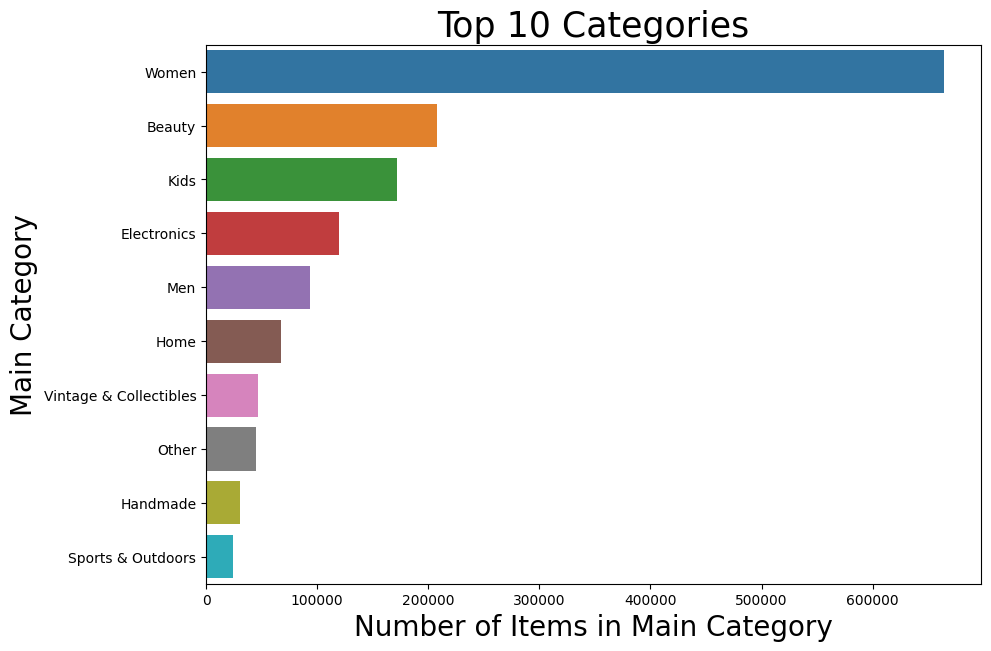

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()

**Interesting findings:**
- Women and Beauty take up majority of the distribution
- Women and Beauty take up 56% of the distribution

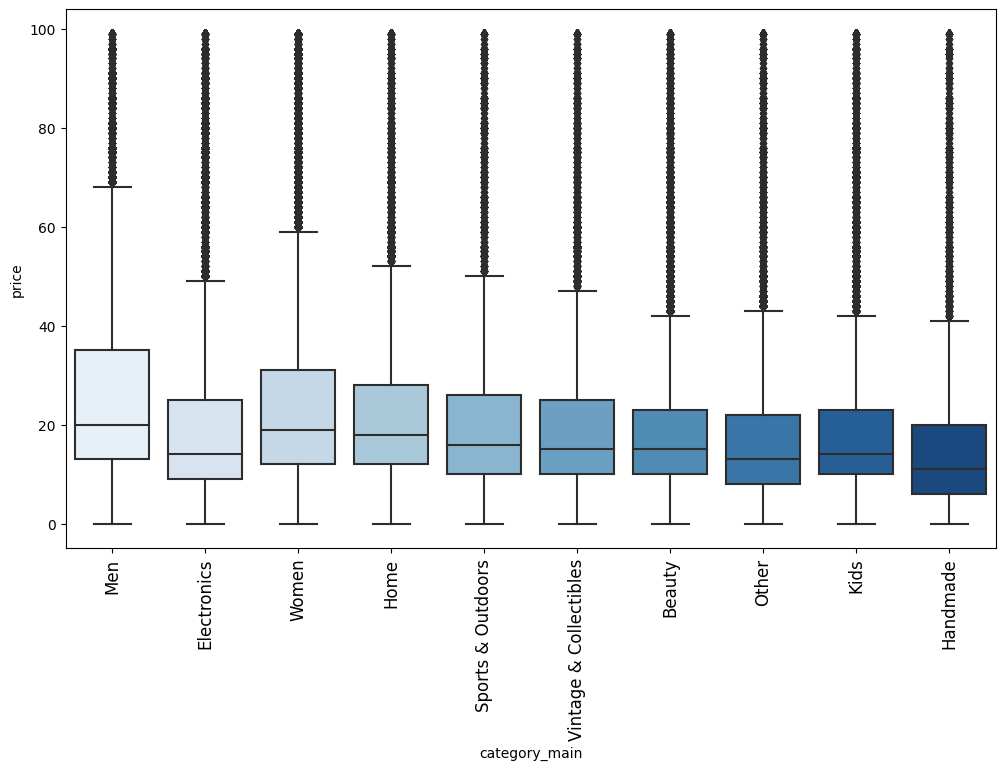

In [35]:
# main = pd.DataFrame(cat_train['category_main'].value_counts()).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
fig, axes = plt.subplots(figsize=(12, 7))
main = cat_train[cat_train["price"] < 100]

# Use a color palette
ax = sns.boxplot(x=main["category_main"], y=main["price"], palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

plt.show()


In [36]:
# Create a "no_brand" column 
train['no_brand'] = train['brand_name'].isnull()

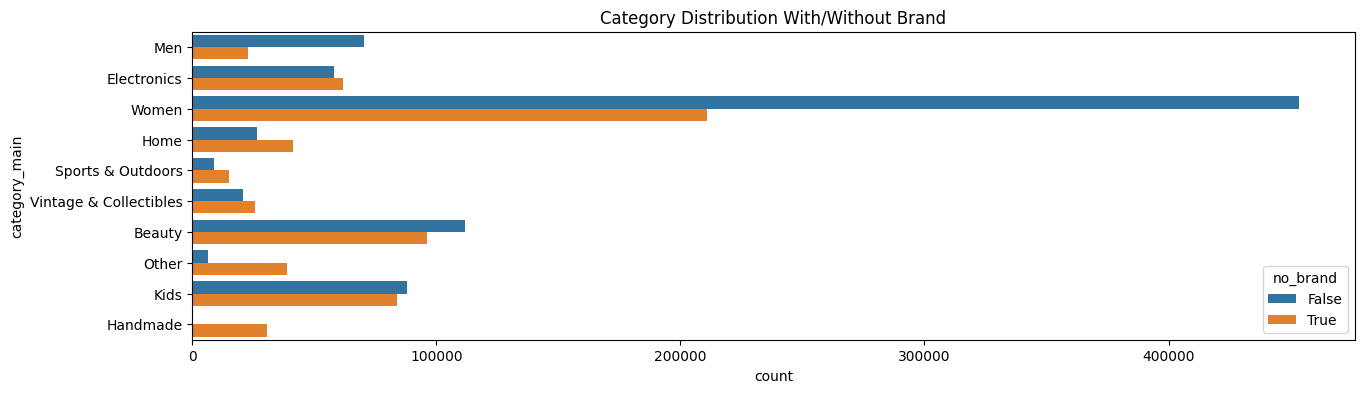

In [37]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='category_main', hue='no_brand', data=train).set_title('Category Distribution With/Without Brand');
plt.show()

**Category_1 Distribution**

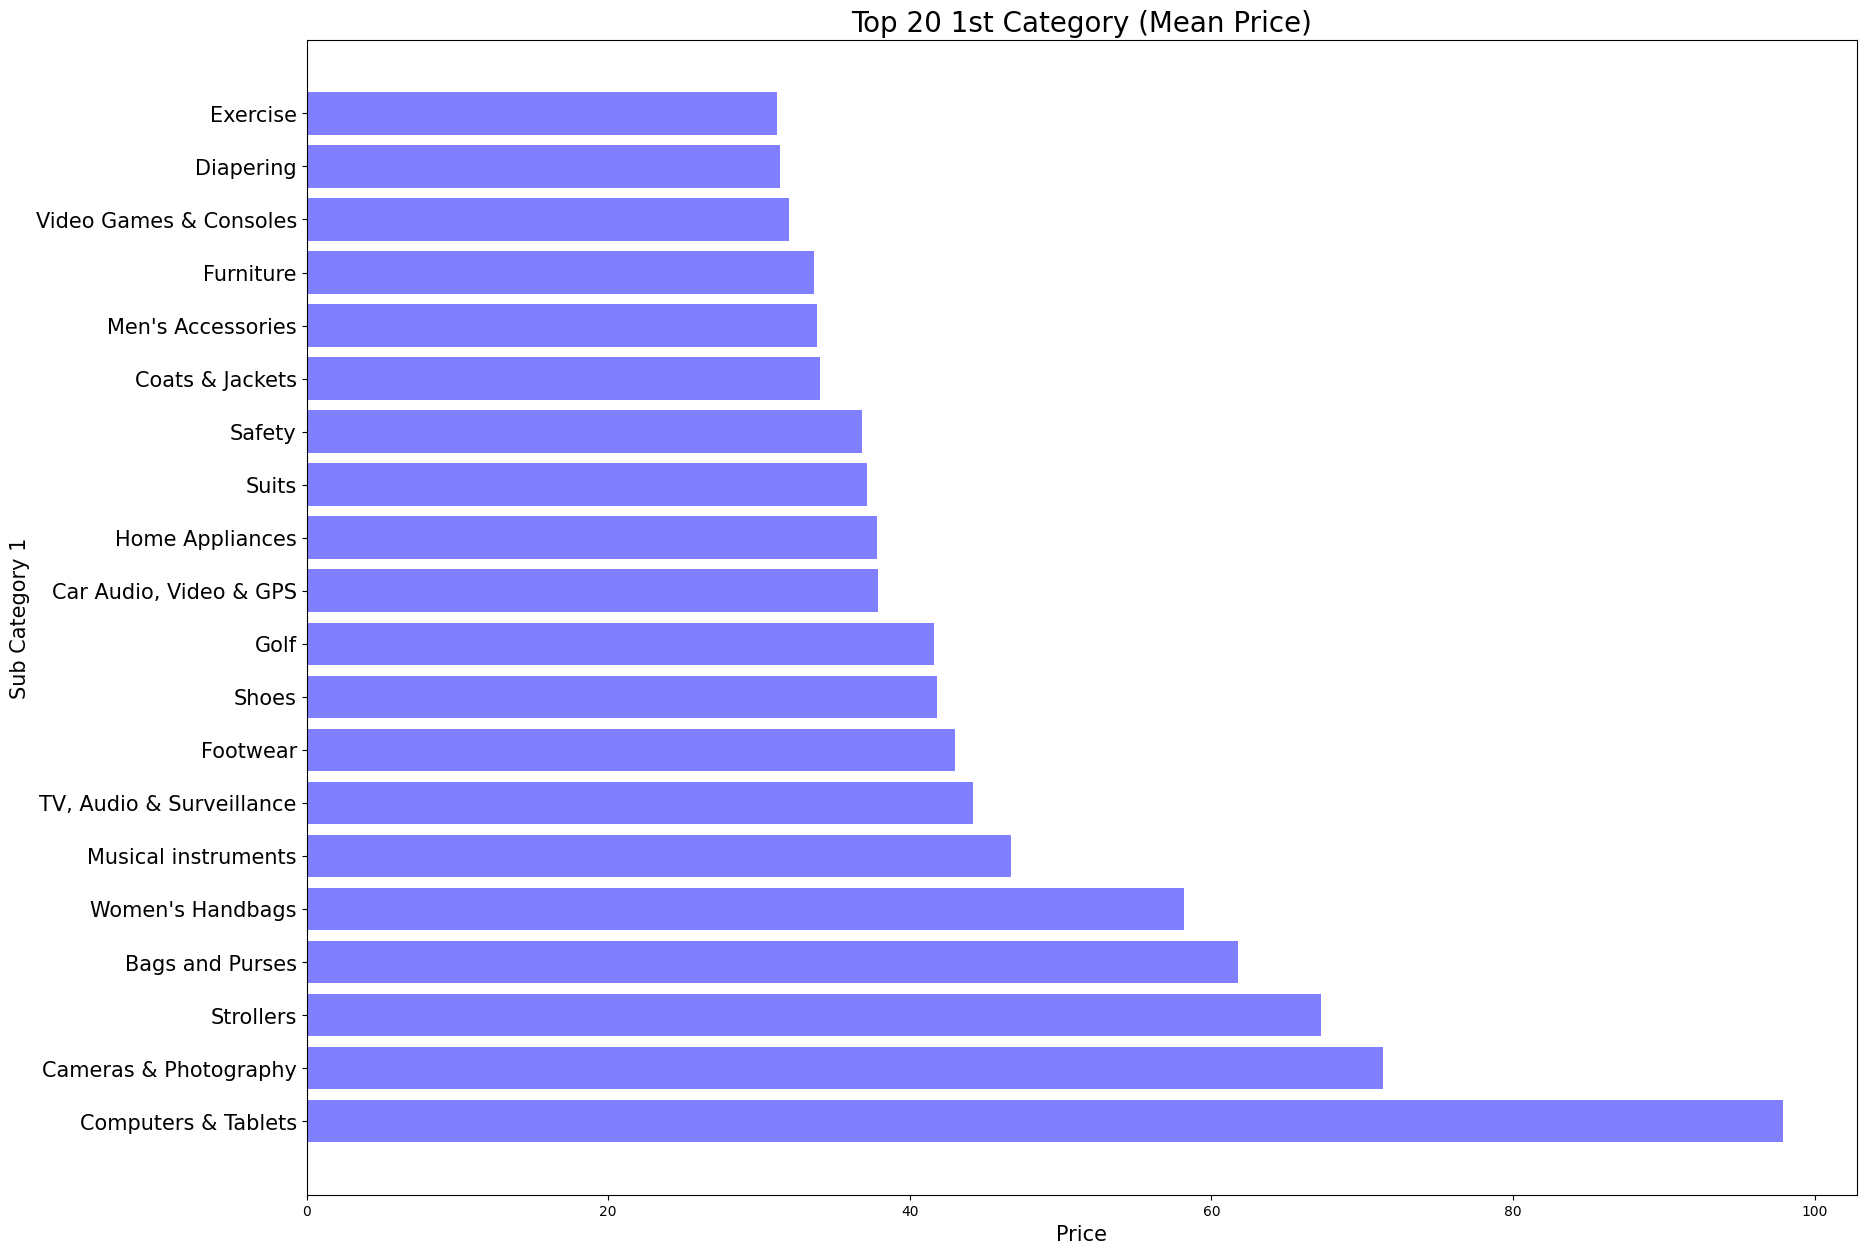

In [38]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()

**Category_2 Distribution**

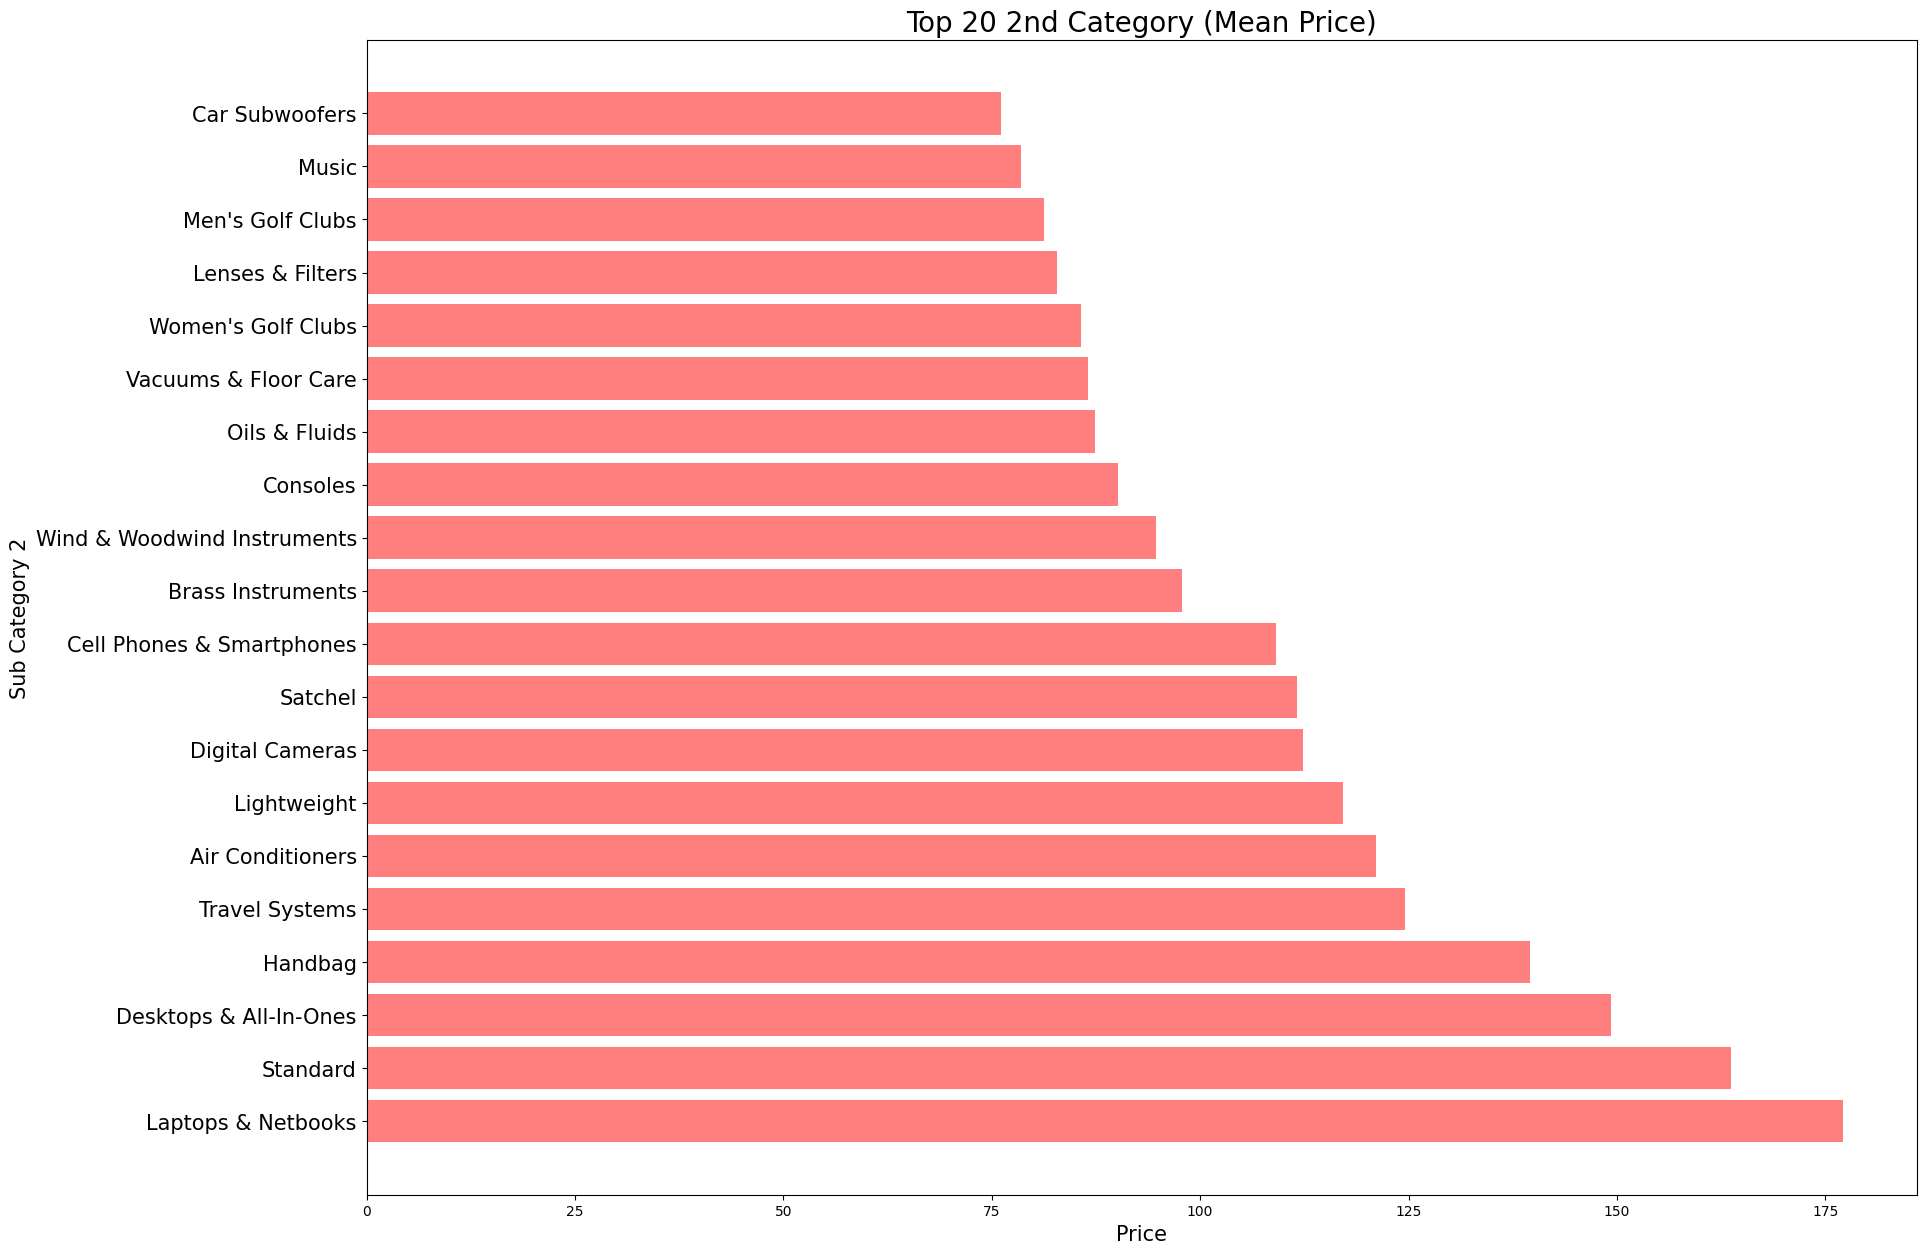

In [39]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(20, 15))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()

**4.Item Description Analysis**

In [40]:
# Remove Punctuation
combined.item_description = combined.item_description.astype(str)

descr = combined[['item_description', 'price']]
descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))

descr['item_description'] = descr['item_description'].apply(remove_digits)
descr['item_description'] = descr['item_description'].apply(remove_punctuation)
descr['item_description'] = descr['item_description'].apply(remove_stop_words)
descr.head(3)

C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\92021824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr['count'] = descr['item_description'].apply(lambda x : len(str(x)))
C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\92021824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr['item_description'] = descr['item_description'].apply(remove_digits)
C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\92021824.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

,item_description,price,count
0,description yet,10.0,18
1,keyboard great condition works like came box p...,52.0,188
2,adorable top hint lace key hole back pale pink...,10.0,124


In [41]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

descr['item_description'] = descr['item_description'].apply(porter.stem)

C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\2758517895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr['item_description'] = descr['item_description'].apply(porter.stem)


In [42]:
descr.tail(10)

,item_description,price,count
693349,❗️listing ❗️ brand new shades piu scarlett piu...,NaN,63
693350,rm free shipping new highly addict,NaN,47
693351,purple boys polo shirt size old navy never worn,NaN,59
693352,express deep olive green cardigan ultra thin ...,NaN,121
693353,shade medium neutral barley us,NaN,41
693354,flintquartz cluster self mined ✨measures xin w...,NaN,241
693355,cosmetics travel bundle includes brow power un...,NaN,968
693356,new free shipping basstop cas,NaN,31
693357,floral kimono tropical print open front hi low...,NaN,94
693358,floral scrub tops worn less times brown belt ti,NaN,71


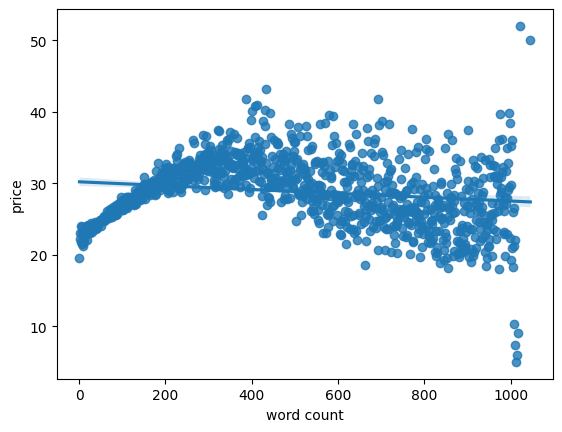

In [43]:
df = descr.groupby('count')['price'].mean().reset_index()
sns.regplot(x=df["count"], y=(df["price"]))
plt.xlabel("word count")
plt.show()

**Create Pre-Processing Functions**
***

In [44]:
combined.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,0.0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,NaN
1,1.0,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,NaN
2,2.0,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,NaN
3,3.0,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,NaN
4,4.0,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,NaN


In [45]:
# handle_missing_values - Basic data imputation of missing values
def handle_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)

In [46]:
# to_categorical - Converts Categorical Features 
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')

**Applying Pre-Processing Functions**
***

In [47]:
# Applying the pre-processing functions
handle_missing_values(combined)
to_categorical(combined)

In [48]:
# apply the pre-processing function to ML combined
handle_missing_values(combined_ML)
to_categorical(combined_ML)

In [49]:
# Remove Punctuation
combined_ML.item_description = combined_ML.item_description.astype(str)

combined_ML['item_description'] = combined_ML['item_description'].apply(remove_digits)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_punctuation)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_stop_words)
combined_ML['item_description'] = combined_ML['item_description'].apply(to_lower)

combined_ML['name'] = combined_ML['name'].apply(remove_digits)
combined_ML['name'] = combined_ML['name'].apply(remove_punctuation)
combined_ML['name'] = combined_ML['name'].apply(remove_stop_words)
combined_ML['name'] = combined_ML['name'].apply(to_lower)

combined_ML.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,NaN,marbled super squishy slime,2,Handmade/Children/Toy,None,NaN,1,oz plus free shipping oz plus shipping oz plu...,314180.0
1,497718.0,charizard ex xy,2,Vintage & Collectibles/Trading Cards/Animation,Pokemon,7.0,1,x charizard ex promo xy sleeve x random pokémo...,NaN
2,1042120.0,calvin klein shirt,2,Women/Athletic Apparel/Sports Bras,Calvin Klein,19.0,0,hello tank worn tag says small tighter chest m...,NaN


In [50]:
# Remove Punctuation
combined.item_description = combined.item_description.astype(str)

combined['item_description'] = combined['item_description'].apply(remove_digits)
combined['item_description'] = combined['item_description'].apply(remove_punctuation)
combined['item_description'] = combined['item_description'].apply(remove_stop_words)
combined['item_description'] = combined['item_description'].apply(to_lower)

combined['name'] = combined['name'].apply(remove_digits)
combined['name'] = combined['name'].apply(remove_punctuation)
combined['name'] = combined['name'].apply(remove_stop_words)
combined['name'] = combined['name'].apply(to_lower)
combined.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,0.0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,None,10.0,1,description yet,NaN
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,NaN
2,2.0,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,NaN


**Create three new features from Categories (Main, Sub1, Sub2)**
***

In [51]:
combined.isnull().any()

train_id              True
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                 True
shipping             False
item_description     False
test_id               True
dtype: bool

In [52]:
combined.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,0.0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,None,10.0,1,description yet,NaN
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,NaN
2,2.0,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,NaN
3,3.0,leather horse statues,1,Home/Home Décor/Home Décor Accents,None,35.0,1,new tags leather horses retail rm stand foot h...,NaN
4,4.0,k gold plated rose,1,Women/Jewelry/Necklaces,None,44.0,0,complete certificate authenticity,NaN


In [53]:
combined_ML.isnull().any()

train_id              True
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                 True
shipping             False
item_description     False
test_id               True
dtype: bool

In [54]:
combined_ML.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,NaN,marbled super squishy slime,2,Handmade/Children/Toy,None,NaN,1,oz plus free shipping oz plus shipping oz plu...,314180.0
1,497718.0,charizard ex xy,2,Vintage & Collectibles/Trading Cards/Animation,Pokemon,7.0,1,x charizard ex promo xy sleeve x random pokémo...,NaN
2,1042120.0,calvin klein shirt,2,Women/Athletic Apparel/Sports Bras,Calvin Klein,19.0,0,hello tank worn tag says small tighter chest m...,NaN
3,487292.0,nwt✅lululemon compression tight leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Lululemon,109.0,0,nwt size flow go yogarun leggings designed no...,NaN
4,NaN,romper white blue,2,"Women/Dresses/Above Knee, Mini",Papaya,NaN,0,description yet,495108.0


**Applying CountVectorizer / TfidfVectorizer / LabelBinarizer**
***

Encode labels into categorical variables: Pandas factorize and scikit-learn LabelEncoder. 
- The result will have 1 dimension.

Encode categorical variable into dummy/indicator (binary) variables: Pandas get_dummies and scikit-learn OneHotEncoder.
- The result will have n dimensions, one by distinct value of the encoded categorical variable.

**Creating new Feature (Binning Price Into Two Categories)**

In [55]:
bins = [0, 64, 5000]
labels = ['less','more']
combined['lt65'] = pd.cut(combined['price'], bins=bins, labels=labels)

combined.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id,lt65
0,0.0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,None,10.0,1,description yet,NaN,less
1,1.0,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,NaN,less
2,2.0,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,NaN,less
3,3.0,leather horse statues,1,Home/Home Décor/Home Décor Accents,None,35.0,1,new tags leather horses retail rm stand foot h...,NaN,less
4,4.0,k gold plated rose,1,Women/Jewelry/Necklaces,None,44.0,0,complete certificate authenticity,NaN,less


In [56]:
# Apply Count Vectorizer to "name", this converts it into a sparse matrix 
cv = CountVectorizer(min_df=10)
X_name = cv.fit_transform(combined['name'])
X_name

<2175894x20470 sparse matrix of type '<class 'numpy.int64'>'
	with 8148734 stored elements in Compressed Sparse Row format>

In [57]:
# Apply Count Vectorizer to "category_name", this converts it into a sparse matrix
cv = CountVectorizer()
X_category = cv.fit_transform(combined['category_name'])
X_category

<2175894x1022 sparse matrix of type '<class 'numpy.int64'>'
	with 8711929 stored elements in Compressed Sparse Row format>

In [58]:
# Apply TFIDF to "item_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(combined['item_description'])

In [59]:
# Apply LabelBinarizer to "brand_name"
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(combined['brand_name'])

**Creating CSR_Matrix & Merge the Sparse Matrices**
***

In [60]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

**Train and Test Split**
***

In [61]:
X_train_sparse = sparse_merge[:train_size]
X_test = sparse_merge[train_size:]

In [62]:
combined.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'test_id', 'lt65'],
      dtype='object')

# Cross Validation

In [63]:
from sklearn.model_selection import KFold

eval_size = 0.10
kf = KFold(n_splits=int(1. / eval_size))
train_indicies, valid_indicies = next(iter(kf.split(X_train_sparse)))
X_train, y_train = X_train_sparse[train_indicies], y[train_indicies]
X_valid, y_valid = X_train_sparse[valid_indicies], y[valid_indicies]


# Create RMSLE Function

Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. **This means the RMSE should be more useful when large errors are particularly undesirable.**

RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

In [64]:
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

## Train with LGBM

The reason why I used this algorithm is because it’s a good model to use on big data sets. 

It has fast:
- training sped and high efficiency
- low memory usage
- good accuracy
- good compatibility with large datasets. 

In [65]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [66]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'

clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 378.105266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 964366
[LightGBM] [Info] Number of data points in the train set: 1334281, number of used features: 72669
[LightGBM] [Info] Start training from score 2.979244


In [67]:
#Prediction
lgbm_pred=clf.predict(X_valid)

In [68]:
# Transform the prices back to its original price
np.expm1(lgbm_pred)

array([16.50340405, 22.01130195, 17.7223207 , ..., 16.50340405,
       17.7223207 , 16.50340405])

In [69]:
import time
start_time = time.time()
print('[{}] LGBM completed.'.format(time.time() - start_time))
print("LGBM rmsle: "+str(rmsle(np.expm1(y_valid), np.expm1(lgbm_pred))))

[0.0] LGBM completed.
LGBM rmsle: 0.7081166870996294


The RMSLE of LGBM is: **0.7081**

## Train with Ridge Regression

In [70]:
import time 

start_time = time.time()

model = Ridge(solver = "sag", fit_intercept=False)

print("Fitting Ridge Model")
model.fit(X_train, y_train)

preds_valid = model.predict(X_valid)

print('[{}] Ridge completed.'.format(time.time() - start_time))
print("Ridge rmsle: "+str(rmsle(np.expm1(y_valid), np.expm1(preds_valid))))

Fitting Ridge Model
[179.89967727661133] Ridge completed.
Ridge rmsle: 0.47046740405382004


In [71]:
np.expm1(preds_valid)

array([ 9.37027886, 99.98415036,  9.49296778, ..., 28.19772984,
        8.83831121, 11.81204727])

The RMSLE of Ridge Regression is: **0.4704**

## Predict on Test Set

In [72]:
# Predicting on never seen test set
preds = model.predict(X_test)

submission["price"] = np.expm1(preds)
submission.to_csv("submission_ridge.csv", index = False)

C:\Users\Vaibhav Patil\AppData\Local\Temp\ipykernel_1912\3118792625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["price"] = np.expm1(preds)


In [73]:
submission

,test_id,price
0,0,10.500894
1,1,10.644894
2,2,46.382687
3,3,14.942275
4,4,7.087443
...,...,...
693354,693354,20.352873
693355,693355,27.072214
693356,693356,6.293386
693357,693357,15.178887


# Conclusion 
***

I am happy to have this task because it showed me how much pre-processing steps are involved for text data.

I learned the most common steps for text pre-processing and this allowed me to prepare myself for future work whenever I’m against text data again.

I really learned to value more is the choice of algorithms and how important computation is whenever you’re dealing with large datasets. 

It took me a couple of minutes to even perform some data visualizations and modeling. 

Text data is everywhere and it can get messy. 

Understanding the fundamentals on how to tackle these problems will definitely help me out in the future.